# Analisis con Pandas y Kaggle (Core)

El objetivo de esta actividad es poner en práctica todos los conocimientos adquiridos sobre Pandas a través del análisis completo de un dataset. Los estudiantes deben aplicar técnicas de carga, exploración, limpieza, transformación, y agregación de datos para extraer insights valiosos. La actividad no incluye visualización de datos, enfocándose únicamente en el análisis y manipulación de datos con Pandas.

### Instrucciones

### Preparación del Entorno
* Asegúrate de tener instalado Pandas en tu entorno de trabajo.
* Descarga el archivo dataset.csv desde Kaggle. Elige un dataset que te interese y que no incluya visualización de datos. Algunas sugerencias pueden ser datasets relacionados con ventas, compras, productos, etc.
### Cargar los Datos
* Carga el archivo CSV en un DataFrame de Pandas.
* Muestra las primeras 10 filas del DataFrame para confirmar que los datos se han cargado correctamente.
### Exploración Inicial de los Datos
* Muestra las últimas 5 filas del DataFrame.
* Utiliza el método info() para obtener información general sobre el DataFrame, incluyendo el número de entradas, nombres de las columnas, tipos de datos y memoria utilizada.
* Genera estadísticas descriptivas del DataFrame utilizando el método describe().
### Limpieza de Datos
* Identifica y maneja los datos faltantes utilizando técnicas apropiadas (relleno con valores estadísticos, interpolación, eliminación, etc.).
* Corrige los tipos de datos si es necesario (por ejemplo, convertir cadenas a fechas).
* Elimina duplicados si los hay.
### Transformación de Datos
* Crea nuevas columnas basadas en operaciones con las columnas existentes (por ejemplo, calcular ingresos a partir de ventas y precios).
* Normaliza o estandariza columnas si es necesario.
* Clasifica los datos en categorías relevantes.
### Análisis de Datos
* Realiza agrupaciones de datos utilizando groupby para obtener insights específicos (por ejemplo, ventas por producto, ventas por región, etc.).
* Aplica funciones de agregación como sum, mean, count, min, max, std, y var.
* Utiliza el método apply para realizar operaciones más complejas y personalizadas.
### Documentación
*Documenta claramente cada paso del análisis, explicando qué se hizo y por qué se hizo.
* Asegúrate de que el código sea legible y esté bien comentado.

In [30]:
#Cargamos las librerias pertinentes
import pandas as pd
import numpy as np

In [31]:
#Leemos el dataset
df = pd.read_csv('../Data/EconomicData.csv')

Primeras impresiones

In [32]:
print(df.shape)
print('---------------------------')
print(df.info())
print('---------------------------')
print(df.head(10))


(209, 4)
---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        209 non-null    object 
 1   GDP Per Capita                209 non-null    object 
 2   Gini Index                    163 non-null    float64
 3   Gross Domestic Product (GDP)  176 non-null    object 
dtypes: float64(1), object(3)
memory usage: 6.7+ KB
None
---------------------------
                Region GDP Per Capita  Gini Index Gross Domestic Product (GDP)
0          Afghanistan            479         NaN                          NaN
1              Albania          $4.2K       0.332                       $18.9B
2              Algeria          $3.5K       0.276                      $191.9B
3              Andorra         $35.7K         NaN                        $3.4B
4               Angola   

Como el dataset tiene valores resumidos en K, T, M, vamos a reemplazar esos valores

In [33]:
df['GDP Per Capita'] = df['GDP Per Capita'].replace({'\$': '', 'K': '000', 'M': '000000', 'B': '00000000', 'T': '000000000'}, regex=True)

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\guill\AppData\Local\Temp\ipykernel_12884\4112892437.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['GDP Per Capita'] = df['GDP Per Capita'].replace({'\$': '', 'K': '000', 'M': '000000', 'B': '00000000', 'T': '000000000'}, regex=True)


Convertimos la columna GDP per capita a numericos para poder trabajar mejor

In [34]:
df['GDP Per Capita'] = pd.to_numeric(df['GDP Per Capita'], errors='coerce')

Para solucionar los valores faltantes vamos a usar un modelo de regresion lineal para entrenar los datos e imputar los faltantes.

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:

# Crear un modelo de regresión para predecir los valores faltantes
model = LinearRegression()

# Seleccionar las filas sin valores nulos para entrenar el modelo
train_data = df.dropna(subset=['GDP Per Capita', 'Gini Index'])
X_train = train_data[['GDP Per Capita']]
y_train = train_data['Gini Index']

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [37]:

# Predecir los valores faltantes
missing_data = df[df['Gini Index'].isnull()]
X_missing = missing_data[['GDP Per Capita']]
df.loc[df['Gini Index'].isnull(), 'Gini Index'] = model.predict(X_missing)


Verificamos si hay nulos en la columna imputada

In [38]:
df["Gini Index"].isnull().sum()

0

Hacemos el mismo paso para la columna GDP, entrenamos un modelo e imputamos datos

Convertimos la columna GDP a numericos para poder trabajar mejor

In [39]:
df['Gross Domestic Product (GDP)'] = df['Gross Domestic Product (GDP)'].replace({'\$': '', 'K': '000', 'M': '000000', 'B': '00000000', 'T': '000000000'}, regex=True)


<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\guill\AppData\Local\Temp\ipykernel_12884\785445016.py:1: SyntaxWarning: invalid escape sequence '\$'
  df['Gross Domestic Product (GDP)'] = df['Gross Domestic Product (GDP)'].replace({'\$': '', 'K': '000', 'M': '000000', 'B': '00000000', 'T': '000000000'}, regex=True)


Convertimos a numerico para trabajar mejor

In [40]:
df['Gross Domestic Product (GDP)'] = pd.to_numeric(df['Gross Domestic Product (GDP)'], errors='coerce')

Entrenamos el modelo para imputar datos faltantes

In [41]:

# Crear un modelo de regresión para predecir los valores faltantes
model = LinearRegression()

# Seleccionar las filas sin valores nulos para entrenar el modelo
train_data = df.dropna(subset=['GDP Per Capita', 'Gross Domestic Product (GDP)'])
X_train = train_data[['GDP Per Capita']]
y_train = train_data['Gross Domestic Product (GDP)']

# Entrenar el modelo
model.fit(X_train, y_train)


LinearRegression()

In [42]:
# Predecir los valores faltantes
missing_data = df[df['Gross Domestic Product (GDP)'].isnull()]
X_missing = missing_data[['GDP Per Capita']]
df.loc[df['Gross Domestic Product (GDP)'].isnull(), 'Gross Domestic Product (GDP)'] = model.predict(X_missing)


verificamos si hay nulos

In [43]:
df["Gross Domestic Product (GDP)"].isnull().sum()

0

In [44]:
df.isnull().sum()

Region                          0
GDP Per Capita                  0
Gini Index                      0
Gross Domestic Product (GDP)    0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        209 non-null    object 
 1   GDP Per Capita                209 non-null    float64
 2   Gini Index                    209 non-null    float64
 3   Gross Domestic Product (GDP)  209 non-null    float64
dtypes: float64(3), object(1)
memory usage: 6.7+ KB


In [46]:
print(df.describe())

       GDP Per Capita  Gini Index  Gross Domestic Product (GDP)
count      209.000000  209.000000                    209.000000
mean       108.856938    0.382660                    152.332507
std        224.858179    0.069771                    213.003234
min          1.000000    0.246000                    -40.714113
25%          3.800000    0.337000                     14.000000
50%         12.600000    0.380349                     59.400000
75%         44.100000    0.415000                    176.557912
max        973.000000    0.630000                    991.100000


In [47]:
print(df.head(10))

                Region  GDP Per Capita  Gini Index  \
0          Afghanistan           479.0    0.391900   
1              Albania             4.2    0.332000   
2              Algeria             3.5    0.276000   
3              Andorra            35.7    0.380833   
4               Angola             2.9    0.513000   
5             Anguilla            21.2    0.380472   
6  Antigua and Barbuda            15.5    0.380329   
7            Argentina            11.9    0.429000   
8              Armenia             3.8    0.299000   
9                Aruba            25.1    0.380569   

   Gross Domestic Product (GDP)  
0                     67.784848  
1                     18.900000  
2                    191.900000  
3                      3.400000  
4                    106.700000  
5                    172.355005  
6                      1.800000  
7                    632.800000  
8                     19.500000  
9                    171.464171  


Ahora podemos usar la imaginacion para sacar nuevas cosas

In [48]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
df['Cluster'] = kmeans.fit_predict(df[['GDP Per Capita', 'Gini Index', 'Gross Domestic Product (GDP)']])


c:\Users\guill\anaconda3\envs\mitic\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


### Agrupacion Kmens

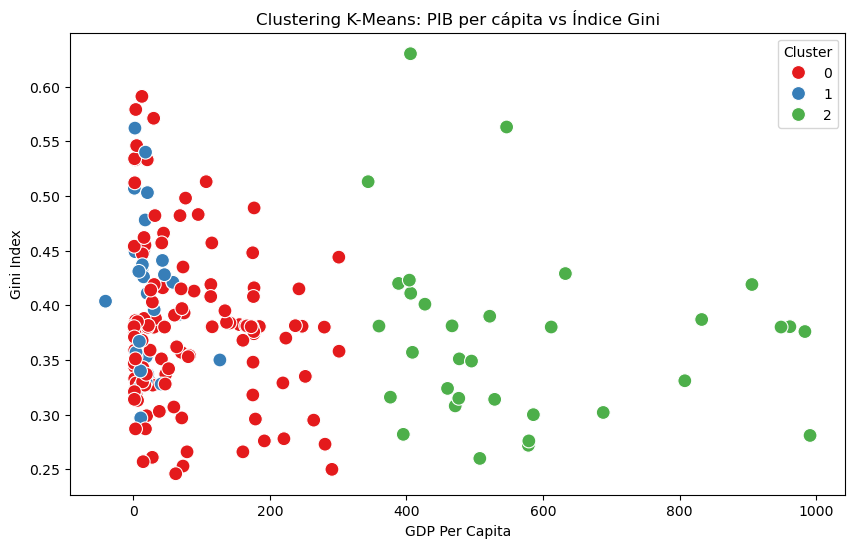

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de dispersión con dos variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross Domestic Product (GDP)', y='Gini Index', hue='Cluster', data=df, palette='Set1', s=100)

# Añadir títulos y etiquetas
plt.title('Clustering K-Means: PIB per cápita vs Índice Gini')
plt.xlabel('GDP Per Capita')
plt.ylabel('Gini Index')
plt.legend(title='Cluster')
plt.show()

### Correlacion entre nuestras variables

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

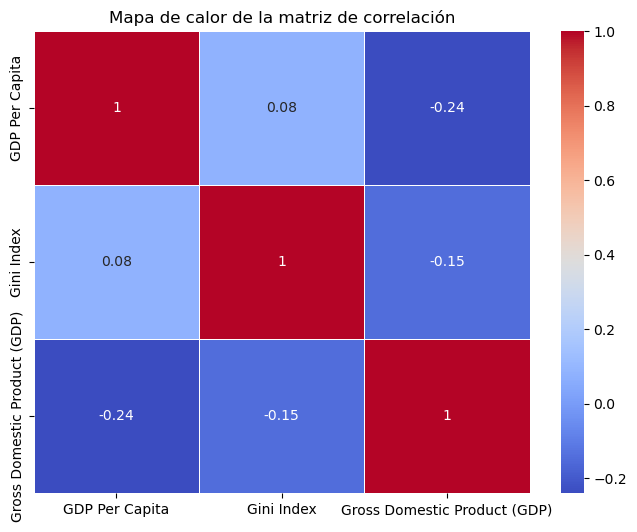

In [51]:
# Calcular la matriz de correlación
correlation_matrix = df[['GDP Per Capita', 'Gini Index', 'Gross Domestic Product (GDP)']].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de la matriz de correlación')
plt.show()


### Clasificacion en Escala

Vamos a clasificar los paises de acuerdo a la escala Gini.

In [52]:
# Crear una función para clasificar el índice Gini
def clasificar_gini(gini):
    if gini < 0.30:
        return 'Bajo'
    elif gini > 0.50:
        return 'Alto'
    else:
        return 'Medio'

In [53]:
df['Nivel_Gini'] = df['Gini Index'].apply(clasificar_gini)

In [54]:
resultado = df.groupby('Nivel_Gini').agg({
    'Region': 'count',  # Cuenta cuántos países hay en cada nivel
    'GDP Per Capita': 'mean',  # Promedio del GDP per cápita
    'Gini Index': ['mean', 'min', 'max']  # Estadísticas del índice Gini
}).round(3)
print("Resumen por nivel de desigualdad:")
print(resultado)

Resumen por nivel de desigualdad:
           Region GDP Per Capita Gini Index              
            count           mean       mean    min    max
Nivel_Gini                                               
Alto           16        136.412      0.546  0.503  0.630
Bajo           22         64.941      0.275  0.246  0.299
Medio         171        111.929      0.381  0.300  0.498


In [55]:
# Paises agrupado por categorias
print("\nPaíses por categoría:")
for nivel in ['Bajo', 'Medio', 'Alto']:
    print(f"\n{nivel} Gini:")
    print(df[df['Nivel_Gini'] == nivel]['Region'].to_list())


Países por categoría:

Bajo Gini:
['Algeria', 'Armenia', 'Azerbaijan', 'Belarus', 'Belgium', 'Croatia', 'Czech Republic', 'Denmark', 'Finland', 'Hungary', 'Iceland', 'Iraq', 'Kazakhstan', 'Kyrgyzstan', 'Malta', 'Moldova', 'Netherlands', 'Norway', 'Slovenia', 'Timor Leste', 'Ukraine', 'United Arab Emirates']

Medio Gini:
['Afghanistan', 'Albania', 'Andorra', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Chad', 'Chile', 'China', 'Comoros', 'Cook Islands', 'Costa Rica', 'Cuba', 'Curacao', 'Cyprus', 'DR Congo', 'DR Congo', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'France', 'French Polynesia', 'Gabon',